**Credit:** Laura Toma,  last 3/31/2023 

## Dynamic programming: The rod cutting problem

Consider the rod cutting problem as discussed in class:  We are given a long steel rod and we need to cut it into smaller pieces which we then sell.  Making a cut is free, and the rod lengths  are always integers.  Assume we are given a table with sale prices: for each i=1, 2, 3, ..., n,   p[i] is the sale price for a rod of length i. 

Goal: Given a rod of length n and a price table p[], determine the maximal revenue obtainable by cutting up the rod and selling the pieces. 

For examples, consider the case when:  n=10 and  p = [0, 1, 5, 8, 9, 19, 17, 17, 20, 24, 30]

In [88]:
price = [0,1,5,8,9,19,17,17,20,24,30]


### Recursive definiton 

Let maxrev(x) denote the maximal revenue obtainable from a rod of length x. 


In [89]:
# PARAMETER x: length of rod
# PARAMETER price:  price array
# RETURN:  the maximal revenue obtainable by cutting the rod of length x
def maxrev(x, price): 
    # basecase
    if x==0: return price[0]
       
    #initialize table rev[] that will store all options 
    choice=[0 for i in range(x+1)]
    
    for i in range(1, x+1): 
        #make first cut at distance i 
        choice[i] = price[i] + maxrev(x-i, price)
    
    return max(choice)


Let's do a sanity check: 

In [90]:
maxrev(i, price)


10

We have shown that  the running time of maxrev(n) as written above is exponential.  

## DP: Recursive (top-down) solution  with memo-ization  

In [91]:
# PARAMETER price: an array of prices
# PARAMETER x: rod length 
# RETURN:  the maximal revenue obtainable from a rod of length x 
def maxrevDP_memoization(x, price): 
    #create and initialize an array to store solutions to subproblems 
    n = len(price)
    INITIAL_VALUE = 0
    table = [ INITIAL_VALUE for i in range(n)]    
    return maxrevDP(x, price, table, INITIAL_VALUE)



# PARAMETER x:  rod length 
# PARAMETER price:  array of prices
# PARAMETER table: array of partial solutions 
# RETURN:  the maximal value obtainable by cutting a rod of length x
def maxrevDP(x, price, table, INITIAL_VALUE): 
    
    # basecase 
    if x==0: return price[0]   
        
    #if this has already been computed, retrieve it 
    if table[x] != INITIAL_VALUE: 
        #print("got it from the table")
        return table[x]
    
    # else: this is the first call to this subproblem. Solve it and store it 
    choice=[0 for i in range(x+1)]
    for i in range(1, x+1): 
        #make first cut at distance i
        choice[i] = price[i] + maxrevDP(x-i, price, table, INITIAL_VALUE)
        
    table[x] = max(choice)
    return table[x]

    

In [92]:
maxrevDP_memoization(10, p)

10

For this particular case, how many times is an entry retrieved from the table? 


### DP: Iterative (bottom-up) solution 


In [93]:
# PARAMETER price: an array of prices
# PARAMETER n: length of rod, n < len(price)
# RETURN: the maximal revenue obtainable by cutting the rod 
def maxrevDP_iterative(n, price): 
    #create and initialize an array to store solutions to subproblems 
    INITIAL_VALUE = 0 
    table = [ INITIAL_VALUE for i in range(n+1)]

    # table[0] = 0
    for x in range(1, n+1):
        # compute maxrev(x) and store it in table[x]
        choice=[0 for i in range(x+1)]
        for i in range(1, x+1): 
            #make first cut at distance i
            choice[i] = price[i] + table[x-i]
        table[x] = max(choice)
   
    # we can print the table 
    # print("the table:")
    # for i in range(n+1): print(table[i], " ")
    return table[n]


In [94]:
 maxrevDP_iterative(10, price)

38

## Empirical evaluation

In [95]:
# set up matplotlib, for plotting stuff.
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [96]:
import time
from random import choice

# runIt: runs myFun function numTrials and times how long it takes on the average.
#
# Input: myFn: a function which takes as input an  integer and an array 
#        n: myFun is run on 1, 2, 3, ..., n
#       
# Returns: nValues, tValues, where running myFun with argument nValues[i] took  tValues[i] milliseconds.
#
def runIt(myFun, n, price, numTrials=10):
    nValues = []
    tValues = []
    for k in range(n):
        # run myFn several times and average to get a decent idea.
        runtime=0
        for i in range(numTrials):
            start = time.time()
            myFun(k, price)
            end = time.time()
            runtime += (end - start) * 1000 # measure in milliseconds
        
        runtime /= numTrials
        nValues.append(k)
        tValues.append(runtime)
    return nValues, tValues



Text(0.5, 1.0, 'Rod cutting numbers')

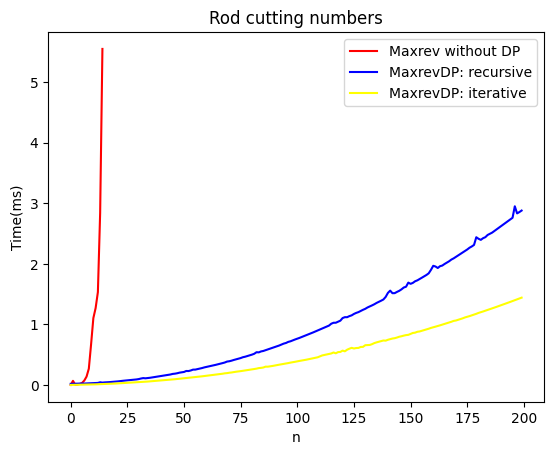

In [97]:
##some prices
p = [i for i in range(1000)]

# run maxrev without DP. Careful to put a small value of n, because for large values it takes forever
nValues, tValues = runIt(maxrev, 15, p, 5)

#run maxrevDP_topdown 
nValuesDP1, tValuesDP1 = runIt(maxrevDP_memoization, 200, p)

#run maxrevDP_bottomup
nValuesDP2, tValuesDP2 = runIt(maxrevDP_iterative, 200, p)

#plot the running times  
plt.plot(nValues, tValues, color="red", label="Maxrev without DP")
plt.plot(nValuesDP1, tValuesDP1, color="blue", label="MaxrevDP: recursive")
plt.plot(nValuesDP2, tValuesDP2, color="yellow", label="MaxrevDP: iterative")


plt.xlabel("n")
plt.ylabel("Time(ms)")
plt.legend()
plt.title("Rod cutting numbers")



Conclusion? 


## Finding the full solution

Finally, we want to extend the solution above in order to compute the actual set of cuts  corresponding to the maximum revenue. 

In general we can choose to extend either the top-down or the bottom-up solution. 


The code below is supposed to extend the MEMO-IZED solution.  AT the moment it's a copy of maxrevDP_memoization method above, but after it finds and prints the max revenue, it calls a function find_cuts() which is supposed to print the cuts corresponding to table[n].  Fill so that you can see the set of cuts.  

In [98]:
# PARAMETER price: an array of prices
# PARAMETER x: rod length 
# RETURN:  the maximal revenue obtainable from a rod of length x and prints the corresponding set of cuts
def maxrevDP_memoization_fullsolution(x, price): 
    #create and initialize an array to store solutions to subproblems 
    n = len(price)
    INITIAL_VALUE = 0
    table = [ INITIAL_VALUE for i in range(n)]    
    rev = maxrevDP_fullsolution(x, price, table, INITIAL_VALUE)
    print("the max rev is ", rev)

    #print the set of cuts corresponding to the max. revenue 
    print("the cuts are:")
    find_cuts(x, table)
    
    

# PARAMETER x:  rod length 
# PARAMETER price:  array of prices
# PARAMETER table: array of partial solutions 
# RETURN:  the maximal value obtainable by cutting a rod of length x
def maxrevDP_fullsolution(x, price, table, INITIAL_VALUE): 
    
    # basecase 
    if x==0: return price[0]   
        
    #if this has already been computed, retrieve it 
    if table[x] != INITIAL_VALUE: 
        #print("got it from the table")
        return table[x]
    
    # else: this is the first call to this subproblem. Solve it and store it 
    choice=[0 for i in range(x+1)]
    for i in range(1, x+1): 
        #make first cut at distance i
        choice[i] = price[i] + maxrevDP(x-i, price, table, INITIAL_VALUE)
        
    table[x] = max(choice)
    return table[x]


## print the set of cuts corresponding to optimal rev for a rod of length x   
def find_cuts(x, table):
    #add your code here 
   
    return 0; 
    

In [99]:
maxrevDP_memoization_fullsolution(10, price)

the max rev is  38
the cuts are:
